# Data cleaning and feature pre-processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Reviews.csv')
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
# check null values
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [6]:
# small amount of null value, drop directly
df= df.dropna()
df.shape

(568411, 10)

## Tokenize and format 'Text' column

In [3]:
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xinyuliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/xinyuliu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/xinyuliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xinyuliu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:
# remove url links in the review columns
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)
# remove html tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df['Text'] = df['Text'].apply(remove_url).apply(remove_html)

In [22]:
import re
stop_words = stopwords.words('english') + list(string.punctuation)
df['tokens'] = df['Text'].apply(word_tokenize)
# remove all stopwords
def filtered(tokens):
    no_stopwords = [word.lower() for word in tokens if word.lower() not in stop_words]
    return no_stopwords
df['tokens'] = df['tokens'].apply(filtered)
df['review'] = df['tokens'].map(lambda x: ' '.join(x))

In [24]:
df['Summary tokens'] = df['Summary'].apply(word_tokenize)
df['Summary tokens'] = df['Summary tokens'].apply(filtered)
df['summary'] = df['Summary tokens'].map(lambda x: ' '.join(x))

In [26]:
# drop uselss column
df.drop(columns=['tokens', 'Text','Summary','Summary tokens'], inplace=True)

In [27]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,review,summary
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,bought several vitality canned dog food produc...,good quality dog food
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,product arrived labeled jumbo salted peanuts ....,advertised
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,confection around centuries light pillowy citr...,`` delight '' says
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,looking secret ingredient robitussin believe f...,cough medicine
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy great price wide assortment yummy ...,great taffy


In [40]:
df.drop(columns=['ProfileName'], inplace=True)

In [3]:
new = pd.read_csv('Amazon_reviews_proprocessed.csv')
new.head(5)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,good quality dog food,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,not as advertised,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,delight says it all,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,cough medicine,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,great taffy,great taffy great price wide assortment yummy ...


In [65]:
# check the word frequency of all reviews see if it makes sense
word_freq_dict = dict()

def freqCount(cmnt):
    for word in cmnt:
        if word in word_freq_dict:
            word_freq_dict[word] +=1
        else:
            word_freq_dict[word] = 1
    return word_freq_dict

full_cmnt = [word for r in new['Text'].values for word in r.split()]
word_freq_dict = freqCount(full_cmnt)
word_freq = pd.DataFrame(list(word_freq_dict.items()),columns = ['word','freq']).sort_values(by='freq',ascending=False).reset_index(drop=True)
word_freq


,word,freq
0,like,251869
1,good,195358
2,one,172308
3,taste,166599
4,coffee,160177
...,...,...
242276,bvcks,1
242277,26ozjust,1
242278,monthmy,1
242279,cois,1


In [67]:
word_freq.head(20)

,word,freq
0,like,251869
1,good,195358
2,one,172308
3,taste,166599
4,coffee,160177
5,great,158672
6,flavor,142443
7,product,135272
8,tea,133132
9,love,126635


In [68]:
word_freq.to_csv('amazon word frequency.csv')

# Sentiment Analysis

## Polarity and subjectivity score

Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment. Subjectivity is the output that lies within [0,1] and refers to personal opinions and judgments.

Polarity: -1 negative, +1 positive

Subjectivity: 0: fact 1: opinion

In [4]:
from textblob import TextBlob
new['Text']= new['Text'].astype(str)
new['polarity'] = new['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
new['subjectivity'] = new['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
new

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,polarity,subjectivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,good quality dog food,bought several vitality canned dog food produc...,0.425000,0.400000
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,not as advertised,product arrived labeled jumbo salted peanutsth...,0.216667,0.762963
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,delight says it all,confection around centuries light pillowy citr...,0.187000,0.548000
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,cough medicine,looking secret ingredient robitussin believe f...,0.150000,0.650000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,great taffy,great taffy great price wide assortment yummy ...,0.458333,0.600000
...,...,...,...,...,...,...,...,...,...,...,...
568406,568450,B001EO7N10,A28KG5XORO54AY,0,0,5,2011-03-09,will not do without,great sesame chickenthis good better resturant...,0.675000,0.662500
568407,568451,B003S1WTCU,A3I8AFVPEE8KI5,0,0,2,2012-03-09,disappointed,disappointed flavor chocolate notes especially...,-0.250000,0.492857
568408,568452,B004I613EE,A121AA1GQV751Z,2,2,5,2012-02-21,perfect for our maltipoo,stars small give 1015 one training session tri...,-0.021875,0.418750
568409,568453,B004I613EE,A3IBEVCTXKNOH,1,1,5,2012-03-13,favorite training and reward treat,best treats training rewarding dog good groomi...,0.521429,0.678571


In [5]:
new['good review'] = new['Score'].apply(lambda x: 1 if x>=3 else 0)

In [6]:
new.to_csv('Amazon_review_sentiment_score.csv')

In [167]:
s=new['good review'].value_counts().to_frame()
s = s.rename(index={1:'good review',0:'bad review'})
s = s.rename(columns={'good review':'review count'})
s

,review count
good review,486404
bad review,82007


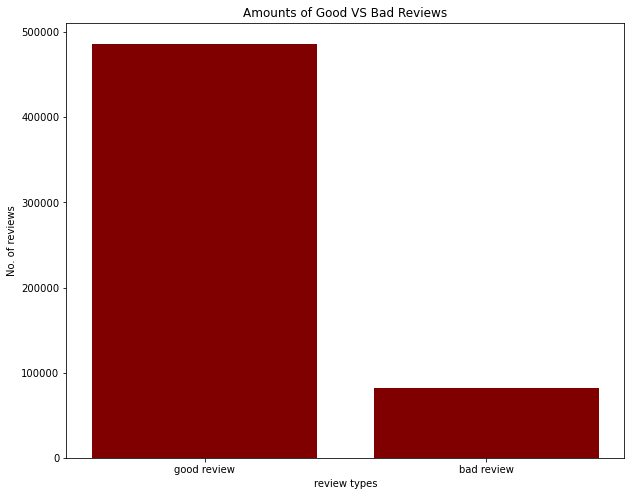

In [168]:
plt.figure(figsize=(10,8))
plt.bar(s.index, s['review count'],color = 'maroon')
plt.xlabel("review types")
plt.ylabel("No. of reviews")
plt.title("Amounts of Good VS Bad Reviews")
plt.show()

In [169]:
new['Score'].value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

In [7]:
sentiment_on_score= pd.DataFrame()
for i in range (1,6):
    sentiment_on_score.loc[i,'polarity']= new[new['Score']==i]['polarity'].mean()
    sentiment_on_score.loc[i,'subjectivity']= new[new['Score']==i]['subjectivity'].mean()
sentiment_on_score

,polarity,subjectivity
1,0.010512,0.509815
2,0.096018,0.513077
3,0.159075,0.518859
4,0.234531,0.541108
5,0.299303,0.559750


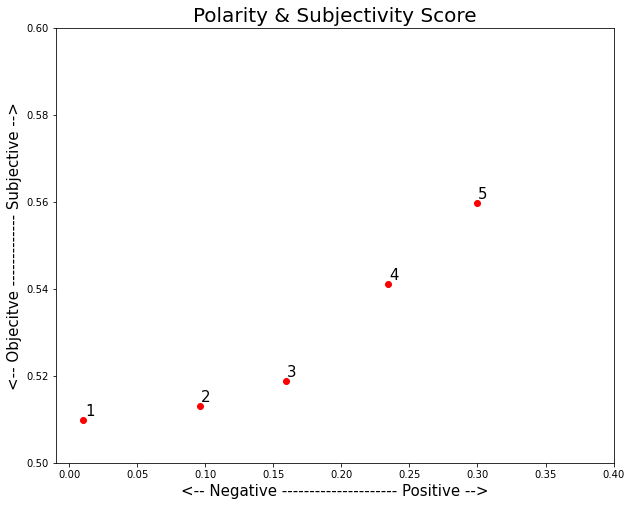

In [74]:
# plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

for i in range(1,6):
    x = sentiment_on_score.loc[i,'polarity']
    y = sentiment_on_score.loc[i,'subjectivity']
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, i, fontsize=15)
    plt.xlim(-.01, .4) 
    plt.ylim(.5, .6) 
    
plt.title('Polarity & Subjectivity Score', fontsize=20)
plt.xlabel('<-- Negative --------------------- Positive -->', fontsize=15)
plt.ylabel('<-- Objecitve ------------- Subjective -->', fontsize=15)

plt.show()

In [170]:
# check Polarity & Subjectivity Score for good and bad reviews
good_bad_score= pd.DataFrame()
for i in range (0,2):
    good_bad_score.loc[i,'polarity']= new[new['good review']==i]['polarity'].mean()
    good_bad_score.loc[i,'subjectivity']= new[new['good review']==i]['subjectivity'].mean()

good_bad_score= good_bad_score.rename(index={0: 'bad review', 1:'good review'})

In [171]:
good_bad_score

,polarity,subjectivity
bad review,0.041524,0.510998
good review,0.276270,0.553074


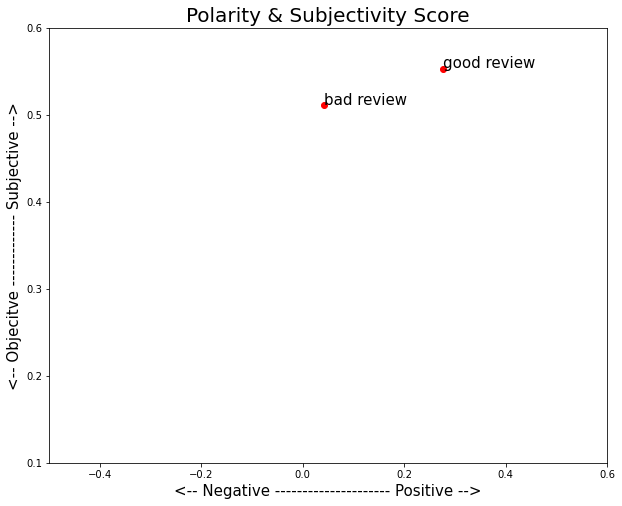

In [172]:
# plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

for i in['bad review','good review']:
    x = good_bad_score.loc[i,'polarity']
    y = good_bad_score.loc[i,'subjectivity']
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, i, fontsize=15)
    plt.xlim(-.5, .6) 
    plt.ylim(.1, .6) 
    
plt.title('Polarity & Subjectivity Score', fontsize=20)
plt.xlabel('<-- Negative --------------------- Positive -->', fontsize=15)
plt.ylabel('<-- Objecitve ------------- Subjective -->', fontsize=15)
plt.show()

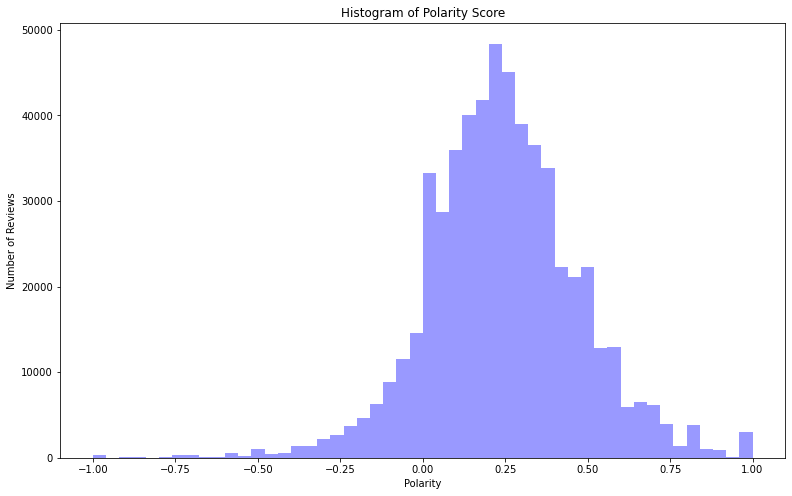

In [173]:
# polarity analysis
num_bins = 50
plt.figure(figsize=(13,8))
plt.hist(x=new.polarity, bins=num_bins,facecolor='blue', alpha=0.4)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show()

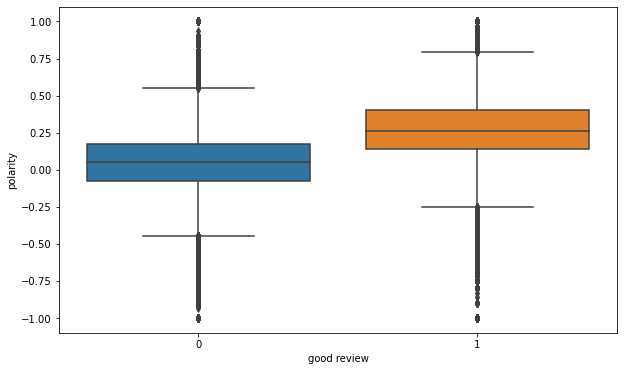

In [174]:
# polarity outlier analysis
plt.figure(figsize=(10,6))
sns.boxplot(x='good review', y='polarity', data=new)
plt.show()

In [144]:
new.columns

Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'polarity', 'subjectivity', 'good review'],
      dtype='object')

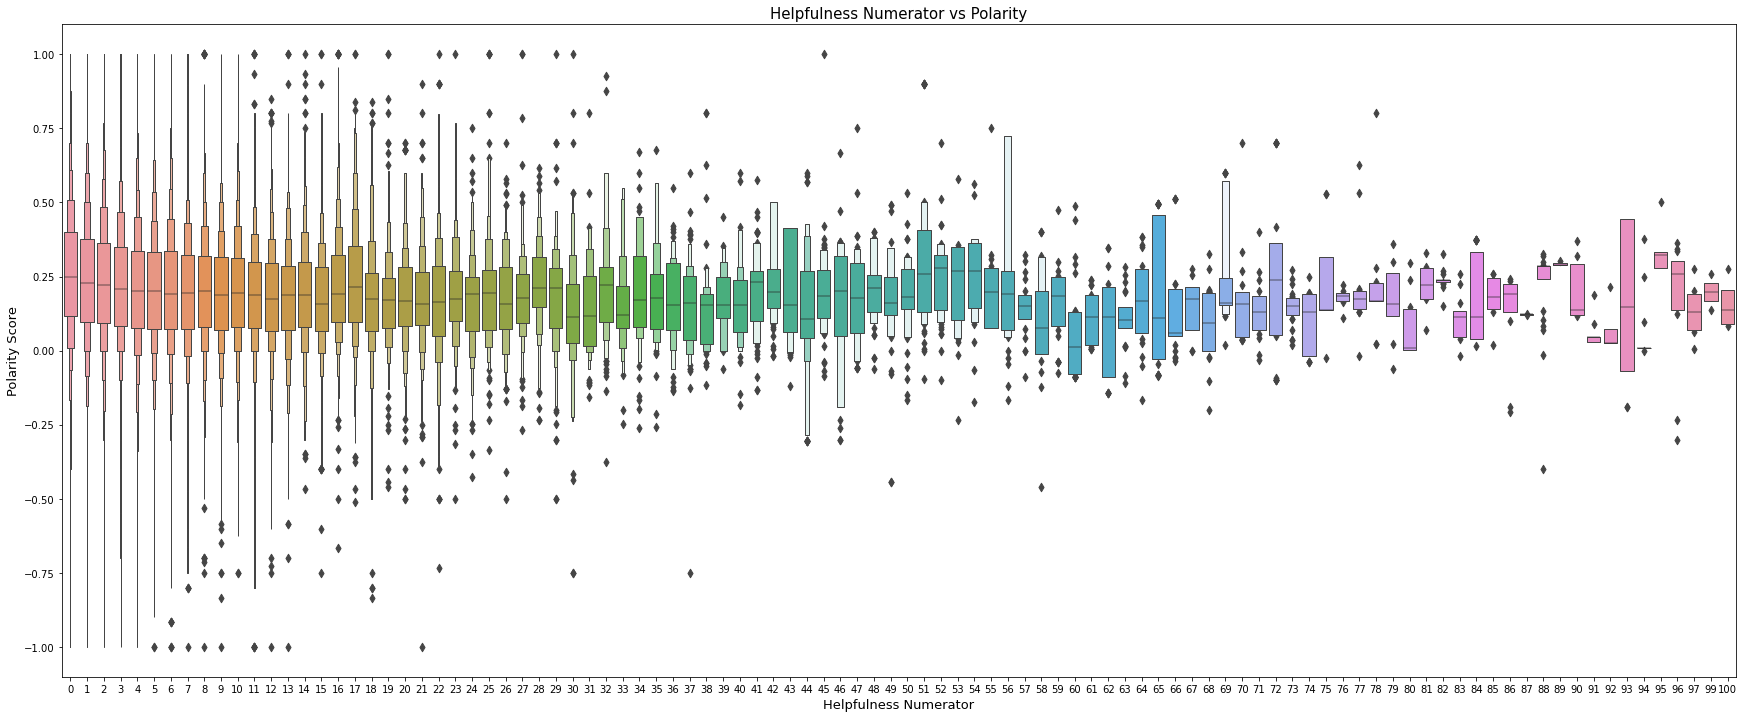

In [175]:
plt.figure(figsize=(30,12))
df_sub = new[new['HelpfulnessNumerator']<=100]
sns.boxenplot(x='HelpfulnessNumerator', y='polarity', data=df_sub)
plt.xlabel('Helpfulness Numerator', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Helpfulness Numerator vs Polarity', fontsize=15)
plt.show()

We have more extreme values at low helpfullness score

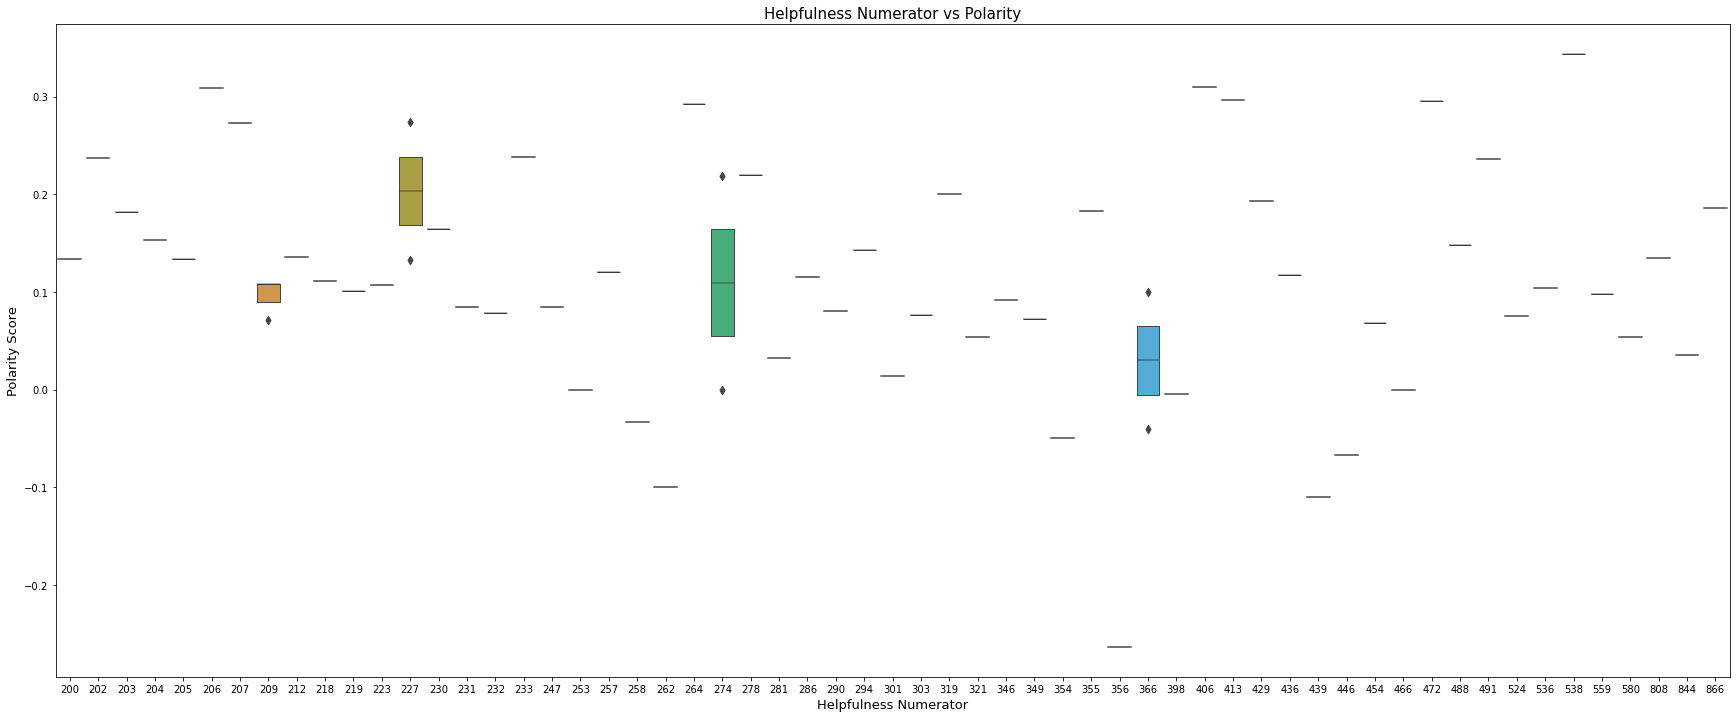

In [176]:
# helpfulness vs polarity
plt.figure(figsize=(30,12))
new['helpful score'] = new['HelpfulnessNumerator']/new['HelpfulnessDenominator']
helpful = new[(new['helpful score'] >= 0.5) & (new['HelpfulnessNumerator'] >= 200)] 
helpful = helpful.dropna()
sns.boxenplot(x='HelpfulnessNumerator', y='polarity', data=helpful)
plt.xlabel('Helpfulness Numerator', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Helpfulness Numerator vs Polarity', fontsize=15)
plt.show()

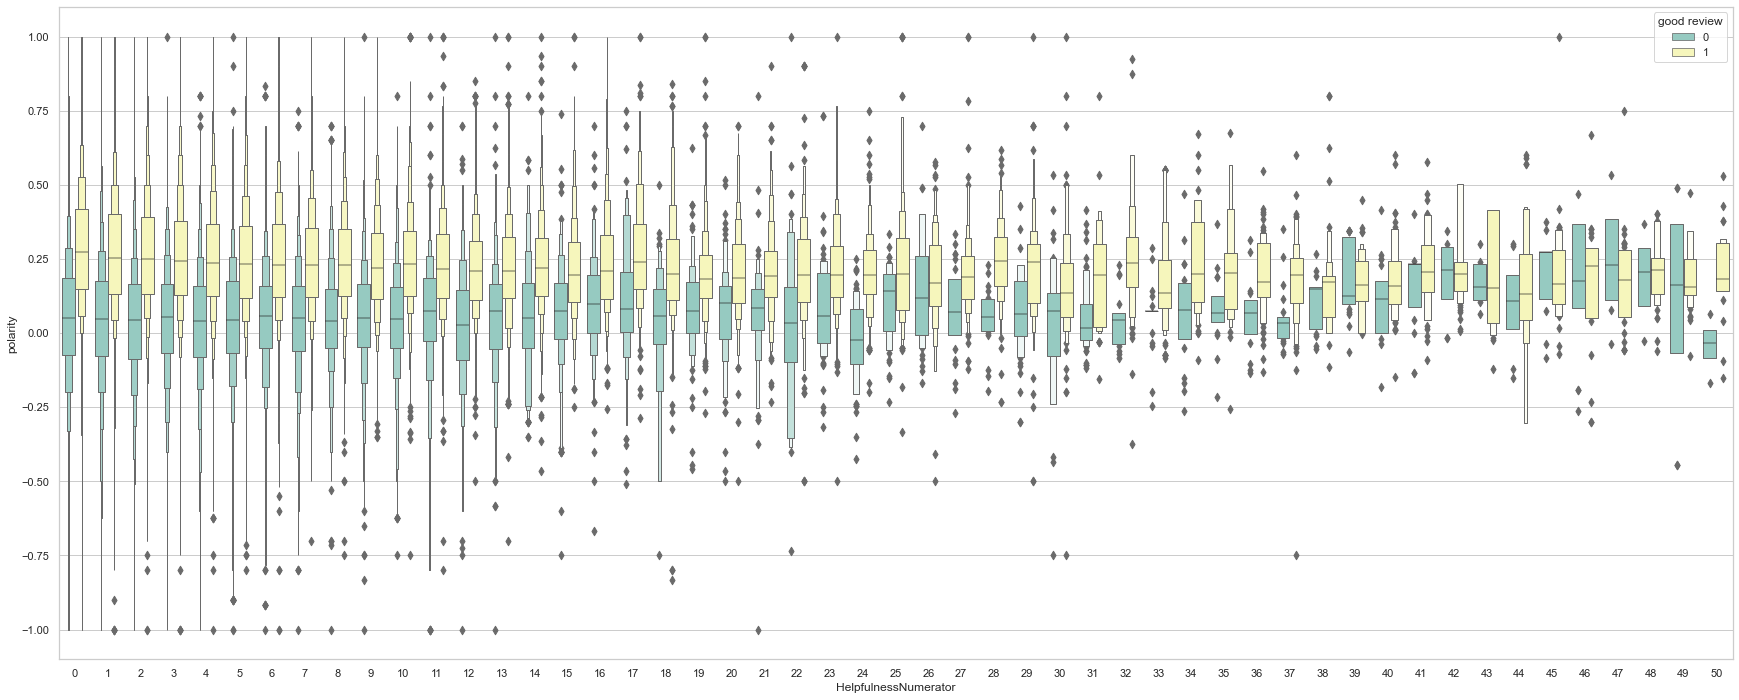

In [190]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,12))
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
df_sub= new.loc[new.HelpfulnessNumerator <=50]
ax = sns.boxenplot(x='HelpfulnessNumerator', y='polarity', hue='good review', data=df_sub,
              palette="Set3")
# each box in Seaborn boxplot is artist and has 6 associated Line2D objects
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+6], col=col, mfc=col, mec=col)

plt.show()

In [205]:
# Top 10 reviews that have highest polarity (most positive sentiment) but 'considered a bad review, and most subjective (opinion):
new.loc[(new["good review"] == 0) & (new['polarity'] == 1 ) & (new['subjectivity'] ==1), "Text"].head(10).tolist()

['used icicle two hours taking break plug laptop wont recognize everything could think fix even hours searching google nothing process return wouldve perfect worked',
 'description tea lists organic ingredients tea received one ingredients organicbr say amazon awesome responding refunding think tea listed organic',
 'damaged cans well eight 12 cans dented box perfectly packaged undamamaged',
 'flavors tried excellent one isnt wouldnt sugges',
 'product wonderful package put box three packages crumbs opened would buy packages packed properl',
 'bought oatmeal target trying save money starbucks oatmeal price 150 perfect diet trying cut sugar oatmeal would perfect separated fruit nuts sugar cinammon add depending people preference',
 'product expired 7 months didnt see anywhere product information impressed',
 'product expired 7 months didnt see anywhere product information impressed',
 'viewing product online thought sounded delicious use stevia sweetener time like taste found things cou

Sarcasm is a reason for high polarity score

In [206]:
# Top 10 reviews that have lowest polarity (most negative sentiment) but 'good review' value is 1, and most subjective (opinion):
new.loc[(new["good review"] == 1) & (new['polarity'] == -1 ) & (new['subjectivity'] ==1), "Text"].head(10).tolist()

['discovered sensitivity gluten 6 months ago dismayed horrible glutenfree foods market since found substitute foods acceptable bisquick glutenfree pancake baking mix one use every sunday make either pancakes waffles recommend mix wholeheartedl',
 'china thing scared minute tastybr one word caution lot product per circumstances freeze leftover productbr rice takes terrible texture inedible',
 'cat review discovered product 30s 80 migraines thirty years pain mausea terrible cola helped nausea never treated migraine anything sn orphan disease',
 'brotherinlaw got hooked bariani olive oil terrificbr use almost every day like storebought brands almost gooey awful tastingbr recommend everyone well everyone wouldn',
 'use give dogs nasty tasting pills works like charm',
 'son loves like cheese pufftype thing leave crumbs everywhere brother banned daughter resulting poop quite terrible',
 'son loves like cheese pufftype thing leave crumbs everywhere brother banned daughter resulting poop quite

As we can see, some of these tweets are about dealing with bad things with the items. But, their polarity scores are -1 because of the job of the item.

/Users/xinyuliu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

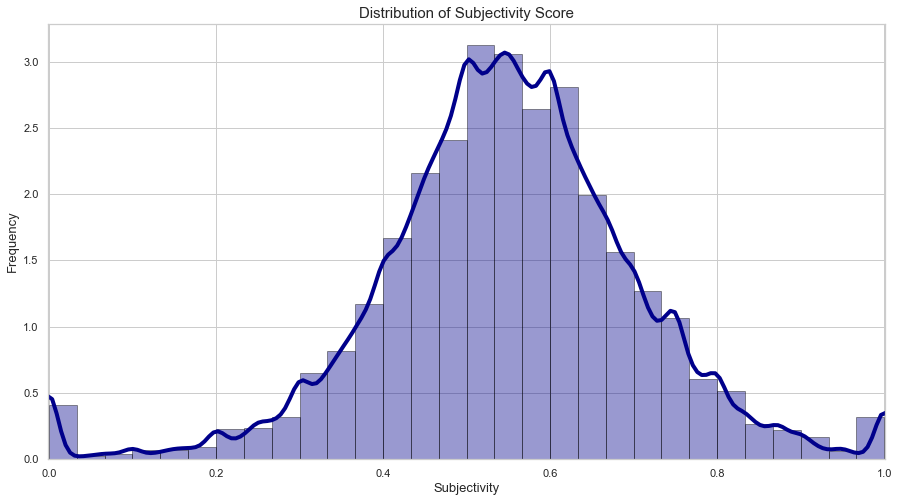

In [199]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(15,8))
sns.distplot(new['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

<Figure size 1440x864 with 0 Axes>

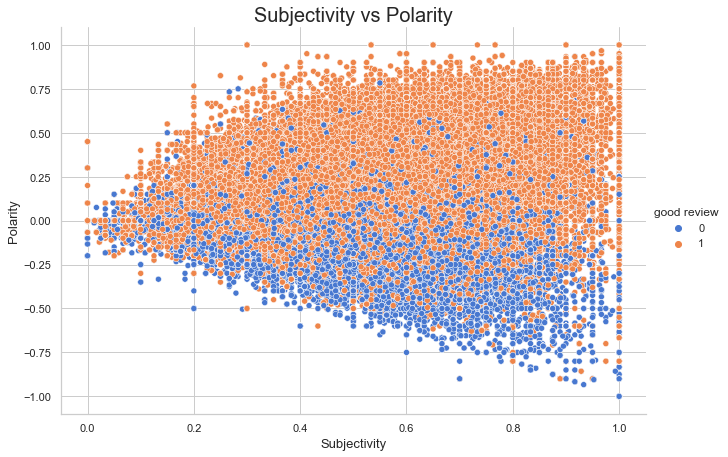

In [203]:
plt.figure(figsize=(20,12))
sns.relplot(x="subjectivity", y="polarity", hue="good review", alpha=1 , palette="muted",
            height=6, aspect= 1.5, data=new)
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Polarity', fontsize=13)
plt.title('Subjectivity vs Polarity', fontsize=20)
plt.show()

# Topic Modeling

The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do Latent Dirichlet Allocation (LDA), which is one of many topic modeling techniques. It was specifically designed for text data.

## Topic modeling on good reviews

In [7]:
new_good_reviews= new.loc[new['good review'] ==1]

# Create document-term matrix
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_matrix = cv.fit_transform(new_good_reviews['Text'])

In [8]:
cv_matrix.shape

(486404, 215792)

In [217]:
# Use LDA for clustering
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5)

# document topic matrix for cv_matrix
lda_output = lda.fit_transform(cv_matrix)
print(lda_output.shape)
print(lda_output)

(486404, 5)
[[0.00851249 0.9659485  0.0084993  0.00853462 0.00850508]
 [0.20192708 0.0050114  0.00496873 0.43752998 0.35056282]
 [0.01436101 0.01437196 0.01449668 0.94233496 0.01443539]
 ...
 [0.15165506 0.8322321  0.00536034 0.00537552 0.00537698]
 [0.01092067 0.76060028 0.01068037 0.20710461 0.01069407]
 [0.6855836  0.02043168 0.0204104  0.02089892 0.2526754 ]]


In [218]:
# topics and words matrix
topic_word = lda.components_
print(topic_word.shape)
print(topic_word)

(5, 215792)
[[33.07356964  0.20378844  0.20041406 ...  0.20000357  0.20274338
   0.20000231]
 [13.31879089  0.20263445  0.2007422  ...  1.18983344  0.51679135
   1.19791622]
 [ 0.20025223  6.17409476  0.200001   ...  0.20000291  0.20000469
   0.20000203]
 [ 0.20399907  0.20321522  0.20194664 ...  0.20000203  0.20000309
   0.20207718]
 [ 0.20338817  0.21626712  1.1968961  ...  0.21015805  0.8804575
   0.20000227]]


In [219]:
# column names
topic_names = ["Topic" + str(i) for i in range(lda.n_components)]

# index names
doc_names = ["Doc" + str(i) for i in range(len(new_good_reviews))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=doc_names)

# get dominant topic for each document
topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['topic'] = topic

df_document_topic.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,topic
Doc0,0.01,0.97,0.01,0.01,0.01,1
Doc1,0.20,0.01,0.00,0.44,0.35,3
Doc2,0.01,0.01,0.01,0.94,0.01,3
Doc3,0.24,0.01,0.31,0.44,0.01,3
Doc4,0.01,0.01,0.01,0.97,0.01,3
Doc5,0.02,0.02,0.02,0.93,0.02,3
Doc6,0.02,0.53,0.02,0.02,0.42,1
Doc7,0.01,0.95,0.01,0.01,0.01,1
Doc8,0.00,0.00,0.00,0.16,0.83,4
Doc9,0.01,0.97,0.01,0.01,0.01,1


In [220]:
df_document_topic['topic'].value_counts().to_frame()

,topic
3,174596
2,99805
1,74311
4,69243
0,68449


In [221]:
# topic word matrix
print(lda.components_)

# topic-word matrix
df_topic_words = pd.DataFrame(lda.components_)

# column and index
df_topic_words.columns = cv.get_feature_names()
df_topic_words.index = topic_names

df_topic_words.head()

[[33.07356964  0.20378844  0.20041406 ...  0.20000357  0.20274338
   0.20000231]
 [13.31879089  0.20263445  0.2007422  ...  1.18983344  0.51679135
   1.19791622]
 [ 0.20025223  6.17409476  0.200001   ...  0.20000291  0.20000469
   0.20000203]
 [ 0.20399907  0.20321522  0.20194664 ...  0.20000203  0.20000309
   0.20207718]
 [ 0.20338817  0.21626712  1.1968961  ...  0.21015805  0.8804575
   0.20000227]]


,00,000,00001,00006mgbr,0000soo,0001br,0004,0008,0009,0009373,...,zzzzzzzzzzbr,µg,½inch,½ounce,¾s,ça,çaykur,être,île,îts
Topic0,33.073570,0.203788,0.200414,0.236188,0.200001,0.200001,0.213476,1.197198,0.200002,0.200000,...,0.200004,0.204252,0.200175,0.205870,0.335286,0.200001,0.200012,0.200004,0.202743,0.200002
Topic1,13.318791,0.202634,0.200742,1.156598,0.200001,0.200341,0.200790,0.200479,1.194483,0.223381,...,0.200003,8.194868,0.200000,1.188174,0.200003,0.200001,0.200010,1.189833,0.516791,1.197916
Topic2,0.200252,6.174095,0.200001,0.207212,0.200001,0.200000,0.200701,0.201133,0.200001,0.200000,...,0.265543,0.200000,0.200000,0.200001,0.353779,1.199995,0.372707,0.200003,0.200005,0.200002
Topic3,0.203999,0.203215,0.201947,0.200001,1.193453,0.200594,0.200000,0.200677,0.205512,1.161359,...,0.200002,0.200000,0.200000,0.204355,0.840752,0.200001,0.200007,0.200002,0.200003,0.202077
Topic4,0.203388,0.216267,1.196896,0.200001,0.206543,1.199064,1.185032,0.200513,0.200002,0.215260,...,1.134447,0.200879,1.199825,0.201600,0.270180,0.200001,1.027265,0.210158,0.880457,0.200002


In [222]:
# print top n keywords for each topic
def print_topic_words(cv, lda_model, n_words):
    words = np.array(cv.get_feature_names())
    topic_words = []
    # for each topic, we have words weight
    for topic_words_weights in lda_model.components_:
        top_words = topic_words_weights.argsort()[::-1][:n_words]
        topic_words.append(words.take(top_words))
    return topic_words

topic_keywords = print_topic_words(cv=cv, lda_model=lda, n_words=15)        

df_topic_words = pd.DataFrame(topic_keywords)
df_topic_words.columns = ['Word '+str(i) for i in range(df_topic_words.shape[1])]
df_topic_words.index = ['Topic '+str(i) for i in range(df_topic_words.shape[0])]
df_topic_words

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,like,taste,sugar,flavor,chocolate,water,good,milk,sweet,drink,mix,one,use,tastes,coconut
Topic 1,food,dog,dogs,one,treats,cat,like,cats,loves,get,eat,love,would,product,good
Topic 2,coffee,tea,like,good,flavor,cup,one,taste,great,love,strong,drink,green,tried,would
Topic 3,great,good,love,like,amazon,product,price,taste,one,find,would,get,buy,snack,eat
Topic 4,like,use,good,flavor,sauce,one,great,salt,oil,make,hot,little,taste,product,add
